Matplotlib Version: 3.8.2
Matplotlib Installation Directory: c:\Users\win\anaconda3\envs\Ai_proj\Lib\site-packages\matplotlib\__init__.py
Matplotlib Configuration Directory: C:\Users\win\.matplotlib
Matplotlib Cache Directory: C:\Users\win\.matplotlib
Data types of each column:
Unnamed: 0     int64
연령            object
성별            object
상황키워드         object
신체질환          object
감정_대분류        object
감정_소분류        object
사람문장1         object
시스템문장1        object
사람문장2         object
시스템문장2        object
사람문장3         object
시스템문장3        object
dtype: object

DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51630 entries, 0 to 51629
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  51630 non-null  int64 
 1   연령          51630 non-null  object
 2   성별          51630 non-null  object
 3   상황키워드       51630 non-null  object
 4   신체질환        51630 non-null  object
 5   감정_대분류      51630 no

C:\Users\win\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\win\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\win\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\win\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\win\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing f

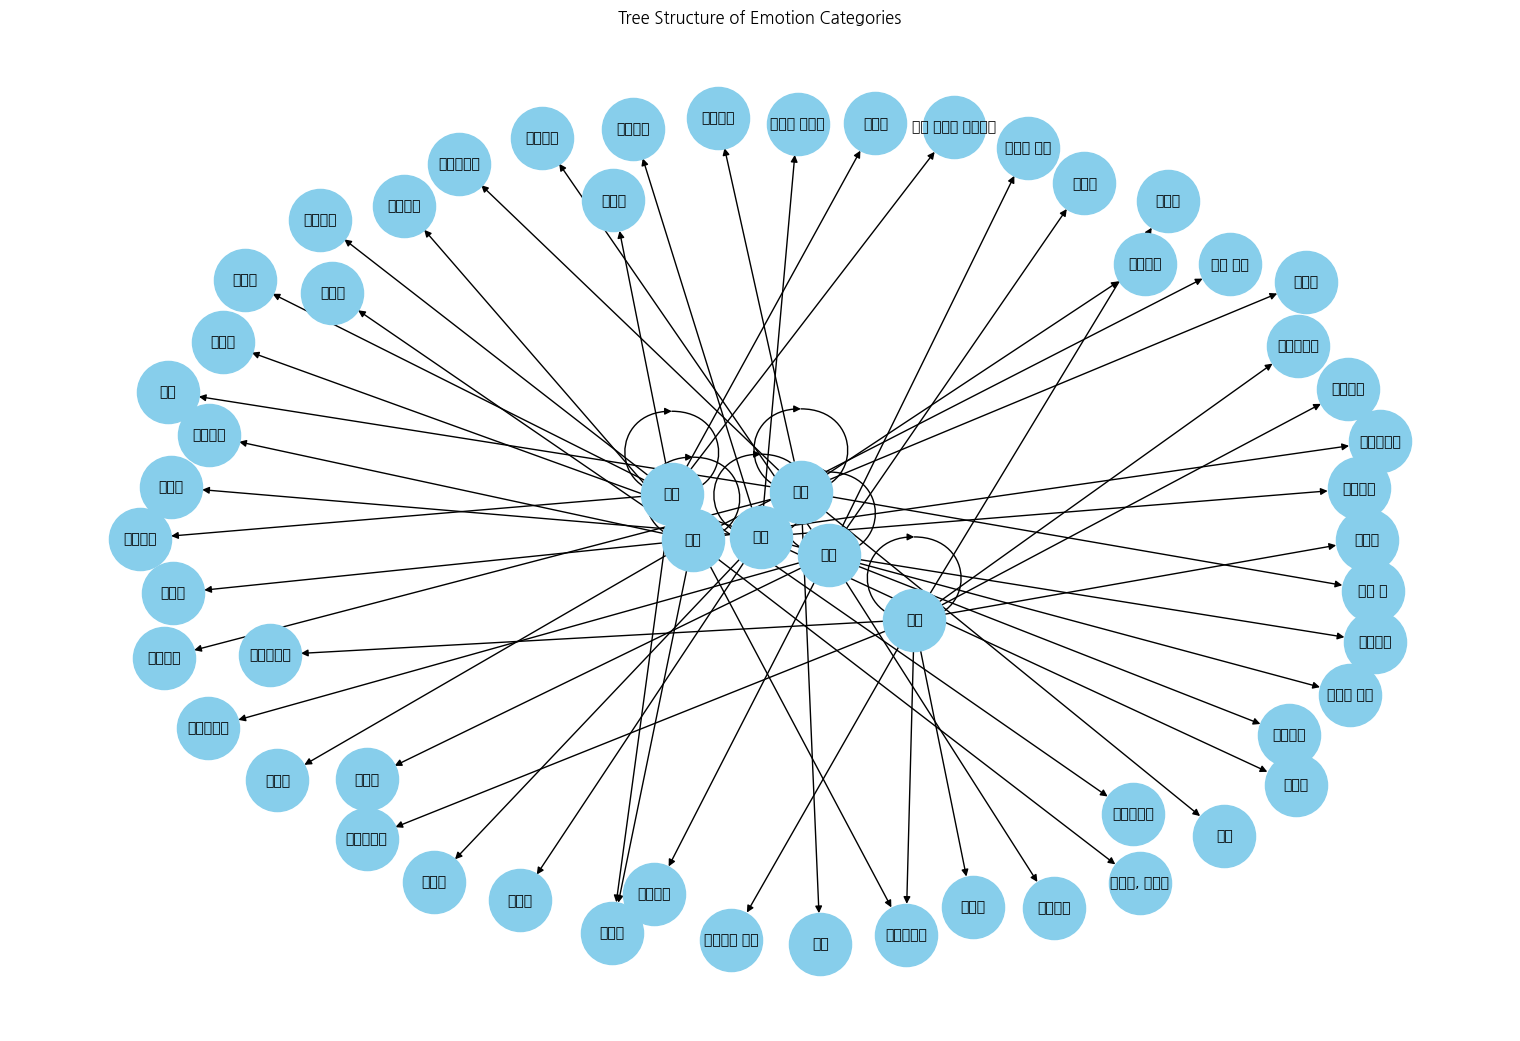

In [11]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl

# Update matplotlib's settings to use a font that supports Korean
mpl.rcParams['font.family'] = 'NanumGothic'

print("Matplotlib Version:", mpl.__version__)
print("Matplotlib Installation Directory:", mpl.__file__)
print("Matplotlib Configuration Directory:", mpl.get_configdir())
print("Matplotlib Cache Directory:", mpl.get_cachedir())

# Load the dataset
file_path = 'C:\\Users\\win\\Documents\\GitHub\\-Ai\\감성대화말뭉치(최종데이터)_Training.csv'
data = pd.read_csv(file_path, encoding='utf-8')
# Using dtypes to get the data type of each column
print("Data types of each column:")
print(data.dtypes)

# Using info() to get a summary including data types
print("\nDataFrame Summary:")
data.info()

# Extracting the relevant columns
emotion_major = data['감정_대분류']
emotion_subcategory = data['감정_소분류']

# Creating a dictionary to map major emotion categories to their subcategories
emotion_tree = defaultdict(set)
for major, sub in zip(emotion_major, emotion_subcategory):
    emotion_tree[major].add(sub)

# Creating a network graph from the tree structure
G = nx.DiGraph()
for major in emotion_tree:
    G.add_node(major)
    for sub in emotion_tree[major]:
        G.add_node(sub)
        G.add_edge(major, sub)

# Plotting the tree
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)
plt.title("Tree Structure of Emotion Categories")
plt.show()

### 문제 현상
- 한글이 깨지는 현상 발생
- 감성 분석에 관한 프롬프트를 영어로 구성해야 함.
- 기존 데이터에 나와 있는 '감정_대분류'와 '감정 소분류' 특성을 영어로 번역할 필요
  → 한국어 감정과 영어 감정의 차이점으로 인한 번역 문제 발생.
    한국어의 '화남'과 '노여워함' 등이 영어로는 똑같이 'angry'로 번역.



### 해결 방안
- '감정_대분류'와 '감정 소분류'에 대한 고유 벡터를 구함.
- 고유 벡터의 각 요소들을 규칙적인 고유 코드로 변환
- dictionary로 {(원래 값):(번역 값), ..} 형식으로 구성하여 '감정_대분류'와 '감정 소분류'를 고유 코드로 변환함.

In [12]:
# '감정_대분류'에 대한 고유값 확인

### ● '감정_대분류'에 대한 고유값 확인
### ● 고유값에 대해 코드 부여

In [13]:
data['감정_대분류'].value_counts()
Bigunique_vect = data['감정_대분류'].unique()
print(data['감정_대분류'].unique())
Bigdict = {}

# 감정_대분류에 대한 각각 요소의 코드는 'E0' + i 형식으로 정의함
for i in range(len(Bigunique_vect)):
    Bigdict[Bigunique_vect[i]] = 'E0' + str(i)

print(Bigdict)

['분노' '기쁨' '불안' '당황' '슬픔' '상처']
{'분노': 'E00', '기쁨': 'E01', '불안': 'E02', '당황': 'E03', '슬픔': 'E04', '상처': 'E05'}


### ● '감정_소분류'에 대한 고유값 확인
### ● 고유값에 대해 코드 부여

In [14]:
data['감정_소분류'].value_counts()
Smallunique_vect = data['감정_소분류'].unique()
Smalldict = {}

# 감정_소분류에 대한 각각 요소의 코드는 'E0' + i 형식으로 정의함
for i in range(len(Smallunique_vect)):
    Smalldict[Smallunique_vect[i]] = 'E1' + str(i)

print(Smalldict)    

{'노여워하는': 'E10', '느긋': 'E11', '걱정스러운': 'E12', '당혹스러운': 'E13', '당황': 'E14', '마비된': 'E15', '만족스러운': 'E16', '배신당한': 'E17', '버려진': 'E18', '부끄러운': 'E19', '분노': 'E110', '불안': 'E111', '비통한': 'E112', '상처': 'E113', '성가신': 'E114', '스트레스 받는': 'E115', '슬픔': 'E116', '신뢰하는': 'E117', '신이 난': 'E118', '실망한': 'E119', '악의적인': 'E120', '안달하는': 'E121', '안도': 'E122', '억울한': 'E123', '열등감': 'E124', '염세적인': 'E125', '외로운': 'E126', '우울한': 'E127', '고립된': 'E128', '좌절한': 'E129', '후회되는': 'E130', '혐오스러운': 'E131', '한심한': 'E132', '자신하는': 'E133', '기쁨': 'E134', '툴툴대는': 'E135', '남의 시선을 의식하는': 'E136', '회의적인': 'E137', '죄책감의': 'E138', '혼란스러운': 'E139', '초조한': 'E140', '흥분': 'E141', '충격 받은': 'E142', '취약한': 'E143', '편안한': 'E144', '방어적인': 'E145', '질투하는': 'E146', '두려운': 'E147', '눈물이 나는': 'E148', '짜증내는': 'E149', '조심스러운': 'E150', '낙담한': 'E151', '환멸을 느끼는': 'E152', '희생된': 'E153', '감사하는': 'E154', '구역질 나는': 'E155', '괴로워하는': 'E156', '가난한, 불우한': 'E157'}


### '감정_대분류'와 '감정_소분류'에 대해서 영어로 변환하는 함수 작성

In [15]:
def conv_eng(emotion):
    if emotion in Smallunique_vect:
        return Smalldict[emotion]
    else:
        return Bigdict[emotion]

#영어로 변환
data['감정_대분류'] = data['감정_대분류'].apply(conv_eng)
data['감정_소분류'] = data['감정_소분류'].apply(conv_eng)


In [16]:
data

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
0,1,청년,여성,"진로,취업,직장",해당없음,E110,E10,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,2,청년,여성,"진로,취업,직장",해당없음,E110,E10,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,3,청년,여성,"진로,취업,직장",해당없음,E110,E10,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,4,청년,여성,"진로,취업,직장",해당없음,E110,E10,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,5,청년,여성,"진로,취업,직장",해당없음,E110,E10,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51625,51626,노년,남성,재정,만성질환 무,E110,E114,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고.,경제적인 문제 때문에 막막하시군요. 마음이 편치 않으시겠어요.,아무것도 할 수 없는 내가 무가치하게 느껴지고 실망스러워.,지금 할 수 있는 가장 합리적인 행동은 무엇인가요?,노년층을 위한 경제적 지원이나 부업 같은 것도 알아보아야겠어.,좋은 결과 얻으시길 바랄게요.
51626,51627,노년,여성,재정,만성질환 무,E111,E140,몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.,건강에 대한 어려움 때문에 기분이 좋지 않으시군요. 속상하시겠어요.,마음 같아서는 다 할 수 있는 일인데 이젠 몸이 안 따라와 주니 화만 나.,어떻게 하면 지금의 기분을 나아지게 할 수 있을까요?,남편과 함께 게이트볼이나 치러 가야겠어. 그럼 기분이 나아질 것 같아.,남편과 함께하는 좋은 외출 시간 되시길 바랄게요.
51627,51628,노년,여성,재정,만성질환 무,E113,E153,이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼.,노후 준비에 대한 어려움 때문에 걱정이 많으시겠어요.,주변 사람들은 다 노후 준비도 잘해두었던데 난 어떻게 해야 할지 모르겠어. 막막하기...,지금의 상황에서 할 수 있는 가장 좋은 행동이 무엇일까요?,남편과 함께 실버 일자리나 노년층을 위한 국가 지원에 대해 자세히 알아보아야겠어.,좋은 정보 많이 얻으셔서 걱정을 좀 덜으셨으면 좋겠어요.
51628,51629,노년,여성,대인관계,만성질환 무,E111,E12,몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가 나.,가족과의 문제 때문에 속상하시겠어요.,이제 할 수 있는 일도 없고 이렇게 힘들게 사는 게 불만스럽기만 해.,지금의 감정을 나아지게 할 수 있는 어떤 방법이 있을까요?,함께 친하게 지내던 동네 언니 동생들과 빈자리를 조금이나마 채울까 해.,지인분들과 좋은 시간 보내셨으면 좋겠어요.


In [ ]:
# 변환된 데이터 저장
data.to_csv('C:\\Users\\win\\Documents\\GitHub\\-Ai\\감성대화말뭉치(최종데이터)_Training_eng.csv', index = False)
with open('C:\\Users\\win\\Documents\\GitHub\\-Ai\\input_audio\\Bigdict.txt', 'w') as file:
    # Write the data to the file
    file.write(Bigdict)

with open('C:\\Users\\win\\Documents\\GitHub\\-Ai\\input_audio\\Smalldict.txt', 'w') as file:
    # Write the data to the file
    file.write(Smalldict)


In [18]:


file_path = 'C:\\Users\\win\\Documents\\GitHub\\-Ai\\감성대화말뭉치(최종데이터)_Training_eng.csv'
data = pd.read_csv(file_path, encoding='utf-8')
# Using dtypes to get the data type of each column
print("Data types of each column:")
print(data.dtypes)

# Using info() to get a summary including data types
print("\nDataFrame Summary:")
data.info()

# Extracting the relevant columns
emotion_major = data['감정_대분류']
emotion_subcategory = data['감정_소분류']

# Creating a dictionary to map major emotion categories to their subcategories
emotion_tree = defaultdict(set)
for major, sub in zip(emotion_major, emotion_subcategory):
    emotion_tree[major].add(sub)

# Creating a network graph from the tree structure
G = nx.DiGraph()
for major in emotion_tree:
    G.add_node(major)
    for sub in emotion_tree[major]:
        G.add_node(sub)
        G.add_edge(major, sub)

# Plotting the tree
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)
plt.title("Tree Structure of Emotion Categories")
plt.show()

OSError: [Errno 22] Invalid argument: 'C:\\Users\\win\\Documents\\GitHub\\-Ai\\감성대화말뭉치(최종데이터)_Training_eng.csv'